# IMPORTING LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# IMPORTING DATASET

In [3]:
data = pd.read_csv("pumpkins.csv")

# EDA

In [4]:
data.head(2)

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,145.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [5]:
# data.info()

In [6]:
data.columns

Index(['Commodity Name', 'City Name', 'Type', 'Package', 'Variety',
       'Sub Variety', 'Grade', 'Date', 'Low Price', 'High Price', 'Mostly Low',
       'Mostly High', 'Origin', 'Origin District', 'Item Size', 'Color',
       'Environment', 'Unit of Sale', 'Quality', 'Condition', 'Appearance',
       'Storage', 'Crop', 'Repack', 'Trans Mode'],
      dtype='object')

In [7]:
data = data[["Item Size" , "Low Price" , "High Price"]]

In [8]:
data.head(2)

,Item Size,Low Price,High Price
0,jbo,140.0,154.75
1,xlge,145.0,154.75


In [9]:
category_map = {'sml': 0, 'med': 1 , 'med-lge': 2, 'lge': 3, 'xlge': 4, 'jbo' : 5, 'exjbo' : 6}

In [10]:
df = data.assign(Size = data["Item Size"].apply(lambda x : category_map.get(x)) ,
           Price  = data[["Low Price" , "High Price"]].mean(axis=1)).drop(["Low Price" , "High Price" , "Item Size"] , axis=1).dropna()

In [11]:
df.dropna(inplace=True)

In [12]:
df.head(4)

,Size,Price
0,5.0,147.375
1,4.0,149.875
2,2.0,152.375
3,0.0,150.000



# MODEL PRE-PROCESSING:

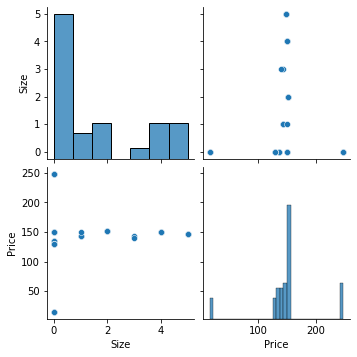

In [13]:
sns.pairplot(df)

In [32]:
y = df[["Size"]]

In [37]:
X = df[["Price"]]

# MODEL TRAINING:

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly_reg = PolynomialFeatures(degree=2)

In [40]:
poly_X = poly_reg.fit_transform(X)

In [41]:
X_train , X_test , y_train , y_test = train_test_split(poly_X , y , train_size=0.8)

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(X_train , y_train)

LinearRegression()

# PREDICTIONS AND EVALUATIONS:

In [44]:
predictions = lm.predict(X_test)

In [45]:
from sklearn import metrics

In [46]:
metrics.mean_absolute_error(y_test , predictions)

1.3655109186332284

In [47]:
metrics.mean_squared_error(y_test , predictions)

3.1317598985051287

In [48]:
np.sqrt(metrics.mean_squared_error(y_test , predictions))

1.7696779081248455

# REIDUAL PLOT:

<AxesSubplot:xlabel='Size', ylabel='Count'>

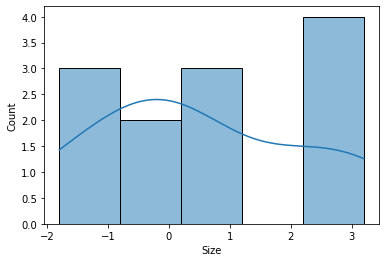

In [49]:
sns.histplot((y_test - lm.predict(X_test)) , kde = True)

In [50]:
lr = LinearRegression()
X0_train , X0_test , y0_train , y0_test = train_test_split(X , y , train_size=0.8)
lr.fit(X0_train , y0_train)

LinearRegression()

In [51]:
preds = lr.predict(X0_test)

In [52]:
metrics.mean_absolute_error(y0_test , preds)

1.672806524592323